 <center> <h2> Implementation of Auto-Encoders </h2> </center>

<center> <h3> Auto-Encoders </h3> </center>

Autoencoders are a type of neural network architecture used for unsupervised learning and dimensionality reduction. They consist of two main components: an encoder and a decoder.

The encoder takes an input data sample and maps it to a lower-dimensional representation called the "encoded" or "latent" space. This is achieved through a series of hidden layers that gradually reduce the dimensionality of the input. Each hidden layer typically applies a non-linear activation function, such as ReLU, to introduce non-linearity into the model.

The decoder, on the other hand, takes the encoded representation and maps it back to the original input space. It has a structure similar to the encoder, but with layers that gradually increase the dimensionality of the representation. The final output of the decoder aims to reconstruct the input data as accurately as possible.

The goal of the autoencoder is to minimize the reconstruction error between the original input and the output of the decoder. By doing so, it learns to capture the most salient features of the input data in the encoded representation. Autoencoders are often used for tasks such as dimensionality reduction, anomaly detection, denoising, and generative modeling.

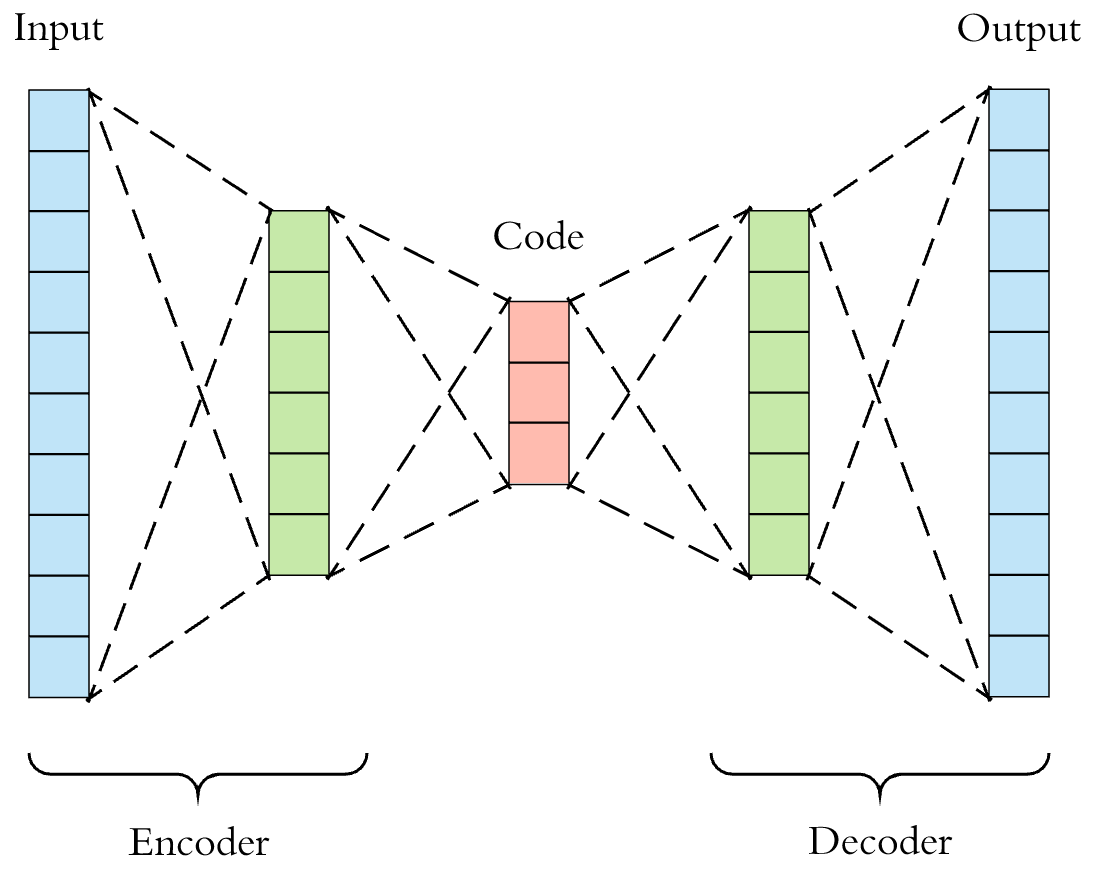

#### Import the Required Packages
First, make sure you have TensorFlow and Matplotlib installed. You can install them using pip:

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

#### Load and Pre-Process the Data
For demonstration purposes, let's use the MNIST dataset, which consists of grayscale images of handwritten digits.

In [2]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape the images to a flat vector
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))


#### Define the Auto-Encoder Model
Now, we'll define the architecture of our autoencoder. It consists of an encoder and a decoder, both implemented as fully connected neural networks.

In [3]:
# Define the dimensions of the input and encoded representations
input_dim = x_train.shape[1]
encoding_dim = 32

# Define the encoder
encoder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(encoding_dim, activation='relu')
])

# Define the decoder
decoder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(encoding_dim,)),
    tf.keras.layers.Dense(input_dim, activation='sigmoid')
])

# Combine the encoder and decoder into an autoencoder
autoencoder = tf.keras.models.Sequential([encoder, decoder])


#### Compile and Train the Model Built
Before training the autoencoder, we need to compile it by specifying the loss function and optimizer.

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
epochs = 10
batch_size = 256
autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 4s 13ms/step - loss: 0.2301 - val_loss: 0.1538
Epoch 2/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1371 - val_loss: 0.1232
Epoch 3/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1177 - val_loss: 0.1095
Epoch 4/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1076 - val_loss: 0.1032
Epoch 5/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1028 - val_loss: 0.0995
Epoch 6/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0997 - val_loss: 0.0975
Epoch 7/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0975 - val_loss: 0.0952
Epoch 8/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0958 - val_loss: 0.0938
Epoch 9/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0945 - val_loss: 0.0927
Epoch 10/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0934 - val_lo

#### Visualize the Results
Finally, let's visualize the original image, the encoded feature map, and the reconstructed image.


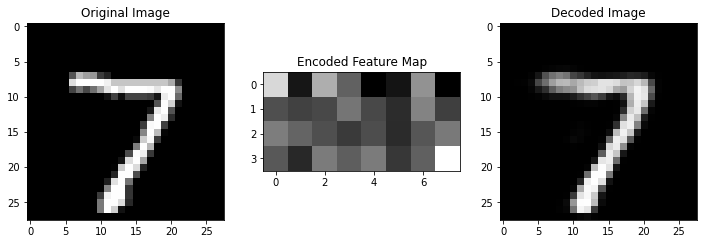

In [5]:
# Select a random image from the test set
image_index = 0
original_image = x_test[image_index]

# Encode and decode the image
encoded_image = encoder.predict(original_image.reshape(1, -1))
decoded_image = decoder.predict(encoded_image)

# Reshape the images to their original dimensions
original_image = original_image.reshape(28, 28)
decoded_image = decoded_image.reshape(28, 28)

# Plot the images
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(encoded_image.reshape(4, 8), cmap='gray')
plt.title('Encoded Feature Map')
plt.subplot(1, 3, 3)
plt.imshow(decoded_image, cmap='gray')
plt.title('Decoded Image')
plt.show()